# Advanced Regression Assignment
## Housing Case Study

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.


The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

## Step 1: Reading and Understanding the Data

In [1]:
# Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Libraries

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

from datetime import date
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

%matplotlib inline

In [3]:
# Reading data from csv file

house_df = pd.read_csv("train.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Shape of data

house_df.shape

(1460, 81)

In [5]:
# Info of data

house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# Summary of data

house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 2: EDA on raw Data

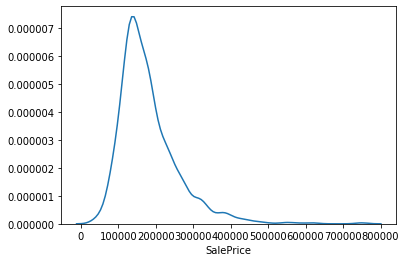

In [7]:
# distribution plot of 'SalePrice'

sns.distplot(house_df['SalePrice'], hist=False)

``SalePrice`` variable is close to normal distribution but for linear regression we need the target variable to be normally distributed. So we need to transform this variable.

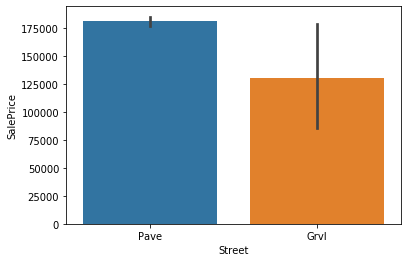

In [8]:
# Bar plot of 'Street' and 'SalePrice'

sns.barplot('Street', 'SalePrice', data=house_df)

From above plot the mean ``SalePrice`` for a **Paved** street is way higher then a **Graved** street.

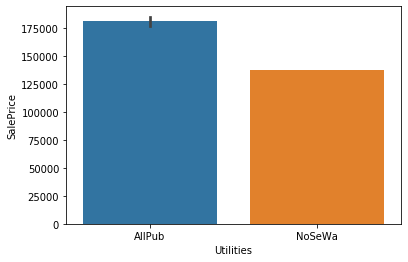

In [9]:
# Bar plot of 'Utilities' and 'SalePrice'

sns.barplot(house_df['Utilities'].fillna('No alley access'), house_df['SalePrice'])

From above plot, it is obvious that price of property with all public utilities is way higher and the mean values look very similar to ``Street`` vs ``SalePrice``. It seems like there might be some interconnection between ``Street`` and ``Utilities``.

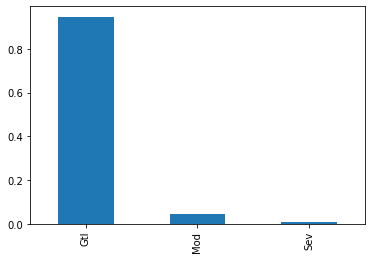

In [10]:
# Bar plot of 'LandSlope'

house_df['LandSlope'].value_counts(normalize=True).plot.bar()

From above plot, it is clear that ``LandSlope`` is a highly skewed column and should be ignored while modelling the data to prevent the model from giving biased results.

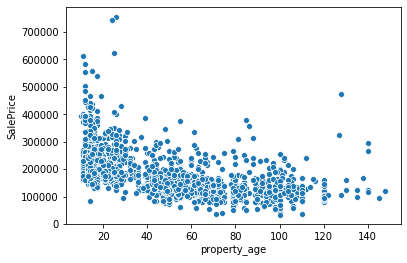

In [11]:
# Calculating age of preoperty and plot the same with 'SalePrice' variable

house_df['property_age'] = date.today().year - house_df['YearBuilt']
sns.scatterplot(house_df['property_age'], house_df['SalePrice'])

From above curve, it is clear the trend is similar to inverse exponential distribution which depicts drop in price with increase in age.

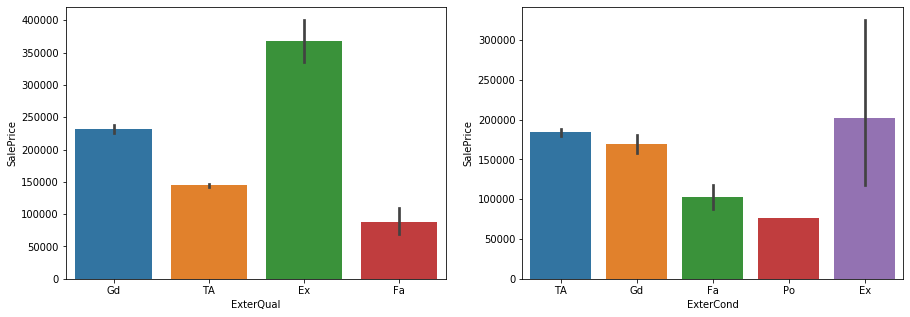

In [12]:
# Mean 'SalePrice' of 'ExterQual' and 'ExterCond'

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot('ExterQual', 'SalePrice', data=house_df)
plt.subplot(122)
sns.barplot('ExterCond', 'SalePrice', data=house_df)

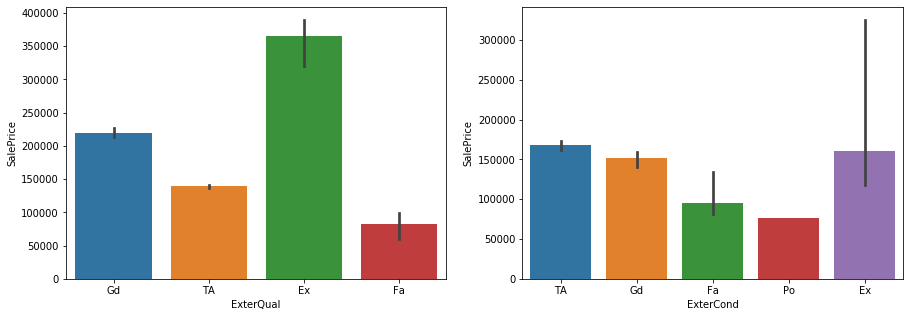

In [13]:
# Median 'SalePrice' of 'ExterQual' and 'ExterCond'

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot('ExterQual', 'SalePrice', data=house_df, estimator=np.median)
plt.subplot(122)
sns.barplot('ExterCond', 'SalePrice', data=house_df, estimator=np.median)

From above plots, it seems like ``ExterQual`` might have significant impact on price than ``ExterCond`` as the mean and median of ``ExterCond`` **TA, GD** and **EX** are quite close to each other.

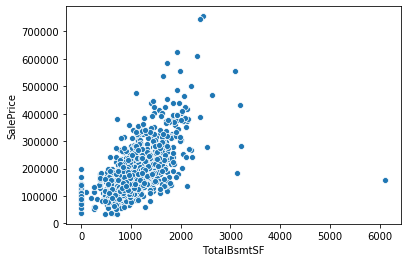

In [14]:
# Scatter plot of 'TotalBsmtSF' and 'SalePrice'

sns.scatterplot(house_df['TotalBsmtSF'], house_df['SalePrice'])

It is quite clear that higher the basement area higher the price of the property.

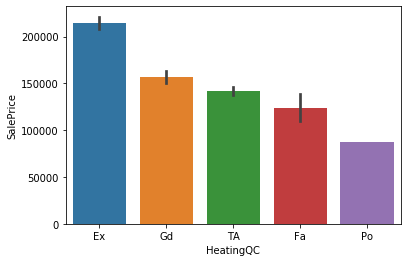

In [15]:
# Bar plot of 'HeatingQC' and 'SalePrice'

sns.barplot('HeatingQC', 'SalePrice', data=house_df)

From above polot, ``HeatingQC`` variable has a significant say on the property price as the price is increasing with increase in quality.

In [16]:
# Value counts of 'CentralAir'

house_df['CentralAir'].value_counts(normalize=True)*100

Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64

Even though Air Conditioning plays a crucial in determining the price of the property, we need to drop from our modelling data as it is highly skewed and if included then our model might give biased results.

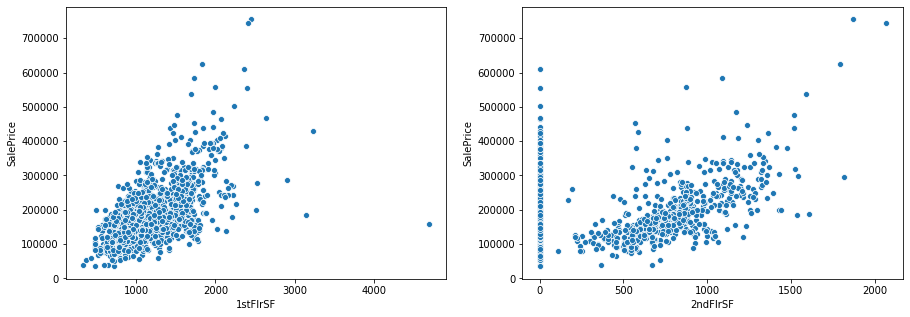

In [17]:
# Scatter plot of '1stFlrSF' and '2ndFlrSF' with 'SalePrice'

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(house_df['1stFlrSF'], house_df['SalePrice'])
plt.subplot(122)
sns.scatterplot(house_df['2ndFlrSF'], house_df['SalePrice'])

From above plot it is evident that the trend in ``1stFlrSF`` plot was lot steeper that then trend in ``2ndFlrSF`` plot. Hence ``1stFlrSF`` has a higher say than ``2ndFlrSF``.

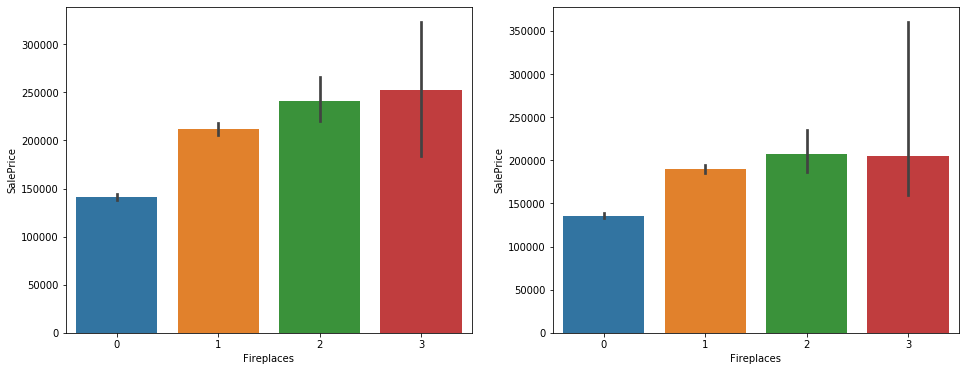

In [18]:
# Median values of 'SalePrice' wrt 'Fireplaces' 

plt.figure(figsize=(16,6))
plt.subplot(121)
sns.barplot('Fireplaces', 'SalePrice', data=house_df)
plt.subplot(122)
sns.barplot('Fireplaces', 'SalePrice', data=house_df, estimator=np.median)

From above plot, the mean and median values of ``SalePrice`` with respect to 1, 2 and 3 fireplaces are very close to each other. Hence this variable might not have a significant relation with ``SalePrice`` variable.

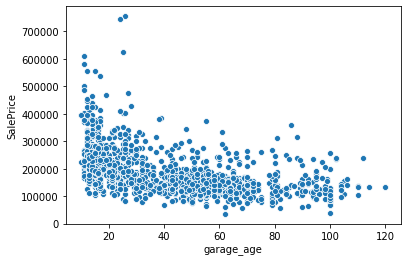

In [19]:
# Calculating age of Garage and plot the same with 'SalePrice' variable

house_df['garage_age'] = date.today().year - house_df['GarageYrBlt']
sns.scatterplot(house_df['garage_age'], house_df['SalePrice'])

From above curve, it is clear the trend is similar to inverse exponential distribution which depicts drop in price of property with increase in age of Garage. The trend is quite similar to the trend of **Property_age**. 

Hence it is quite evident that there might be a correlation between **property_age** and **garage_age**. So we have to make sure that we are using only 1 variable while modelling the data to avoid multi collinearity.

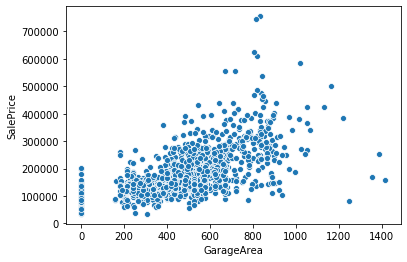

In [20]:
# Scatter plot of 'GarageArea' with 'SalePrice'

sns.scatterplot(house_df['GarageArea'], house_df['SalePrice'])

From above plot it is quite evident that with increase in ``GarageArea`` the price of Property will increase.

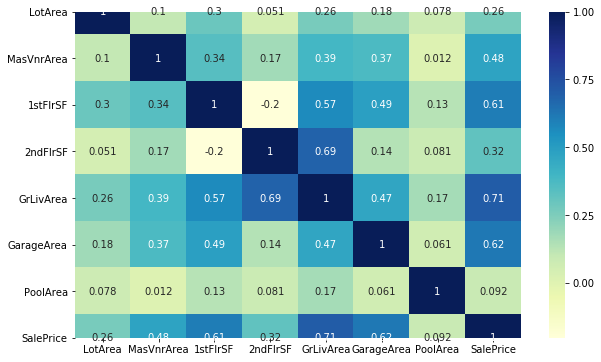

In [21]:
# Heatmap of 'LotArea', 'MasVnrArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'PoolArea' wrt 'SalePrice'

plt.figure(figsize=(10,6))
sns.heatmap(house_df[['LotArea', 'MasVnrArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'PoolArea', 'SalePrice']].corr(), annot=True, cmap='YlGnBu')

From above heatmap, ``GarageArea, GrLiveArea`` and ``1stFlrSF`` have significant say on ``SalePrice`` variable.

``GrLiveArea`` is highly correlated with ``GarageArea`` and ``1stFlrSF``. In order to sure that there is no multicollinearity between these variables we might have to use ``GrLiveArea`` for data modelling.

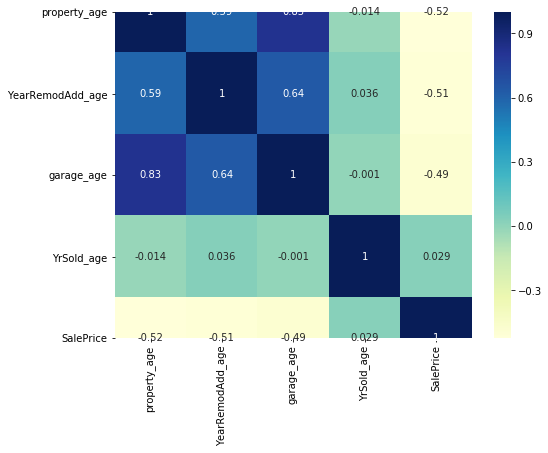

In [22]:
# Heatmap of 'property_age', 'YearRemodAdd_age', 'garage_age', 'YrSold_age' wrt 'SalePrice'

plt.figure(figsize=(8,6))
house_df['YearRemodAdd_age'] = date.today().year - house_df['YearRemodAdd']
house_df['YrSold_age'] = date.today().year - house_df['YrSold']
sns.heatmap(house_df[['property_age', 'YearRemodAdd_age', 'garage_age', 'YrSold_age', 'SalePrice']].corr(), annot=True, cmap='YlGnBu')

From above plot, ``garage_age, YearRomoveAdd_age`` and ``property_age`` are negatively correlated with ``SalePrice``.

``property_age`` variable is highly correlated with ``garage_age`` and ``YearRomoveAdd_age``. Hence we have to use only ``property_age`` while modelling the data to avoid multi collinearity.

## Step 3: Data Cleaning

In [23]:
# Columns length in dataframe

len(house_df.columns)

85

In [24]:
# dropping 'Id' and 'MoSold' columns as they don't much informations and also year columns as we have derived age from the 
#same columns

year_cols = ['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
house_df.drop(columns=year_cols, inplace=True)
len(house_df.columns)

79

In [25]:
# null value percentages

def col_wise_null_percentages():
    col_wise_null_percentages = round(100*house_df.isnull().sum()/len(house_df.index), 2)
    return col_wise_null_percentages[col_wise_null_percentages>0]
col_wise_null_percentages()

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
garage_age       5.55
dtype: float64

``Alley, PoolQC, Fence`` and ``MiscFeature`` have extremely high null values.

In [26]:
# drop high null value percentage columns

del_cols = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
house_df.drop(columns=del_cols, inplace=True)
len(house_df.columns)

75

In [27]:
# null value percentages

col_wise_null_percentages()

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
garage_age       5.55
dtype: float64

In [28]:
# Creating seperate category for variables with meaning full missing values

house_df['BsmtQual'].fillna('No Basement', inplace=True)
house_df['BsmtCond'].fillna('No Basement', inplace=True)
house_df['BsmtExposure'].fillna('No Basement', inplace=True)
house_df['BsmtFinType1'].fillna('No Basement', inplace=True)
house_df['BsmtFinType2'].fillna('No Basement', inplace=True)
house_df['FireplaceQu'].fillna('No Fireplace', inplace=True)
house_df['GarageType'].fillna('No Garage', inplace=True)
house_df['GarageFinish'].fillna('No Garage', inplace=True)
house_df['GarageQual'].fillna('No Garage', inplace=True)
house_df['GarageCond'].fillna('No Garage', inplace=True)

In [29]:
# null value percentages

col_wise_null_percentages()

LotFrontage    17.74
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
garage_age      5.55
dtype: float64

In [30]:
# value counts of 'Street'

house_df['Street'].value_counts(normalize=True)*100

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64

In [31]:
# value counts of 'LandContour'

house_df['LandContour'].value_counts(normalize=True)*100

Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64

In [32]:
# value counts of 'Utilities'

house_df['Utilities'].value_counts(normalize=True)*100

AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64

In [33]:
# value counts of 'LandSlope'

house_df['LandSlope'].value_counts(normalize=True)*100

Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64

In [34]:
# value counts of 'Condition2'

house_df['Condition2'].value_counts(normalize=True)*100

Norm      98.972603
Feedr      0.410959
RRNn       0.136986
PosN       0.136986
Artery     0.136986
RRAe       0.068493
PosA       0.068493
RRAn       0.068493
Name: Condition2, dtype: float64

In [35]:
# value counts of 'RoofMatl'

house_df['RoofMatl'].value_counts(normalize=True)*100

CompShg    98.219178
Tar&Grv     0.753425
WdShngl     0.410959
WdShake     0.342466
ClyTile     0.068493
Metal       0.068493
Membran     0.068493
Roll        0.068493
Name: RoofMatl, dtype: float64

From above analysis, seems like we have skewed columns in out data set.

Lets delete such columns to prevent our model from giving biased results.

In [36]:
# drop skewed variables

skewed_vars = ['MSZoning', 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 
    'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr',
    'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
house_df.drop(columns=skewed_vars, inplace=True)
len(house_df.columns)

51

In [37]:
# null value percentages

col_wise_null_percentages()

LotFrontage    17.74
MasVnrType      0.55
MasVnrArea      0.55
garage_age      5.55
dtype: float64

In [38]:
# Imputing Continuous variables with median and Categorical variables with Mode

house_df['LotFrontage'].fillna(house_df['LotFrontage'].median(), inplace=True)
house_df['MasVnrType'].fillna(house_df['MasVnrType'].mode()[0], inplace=True)
house_df['MasVnrArea'].fillna(house_df['MasVnrArea'].median(), inplace=True)
house_df['garage_age'].fillna(house_df['garage_age'].median(), inplace=True)

In [39]:
# check for null values

house_df.isnull().values.any()

False

## Step 4: Data preparation

One of the assumption of Linear Regression is that our target variable shoule be normally distributed. 

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64


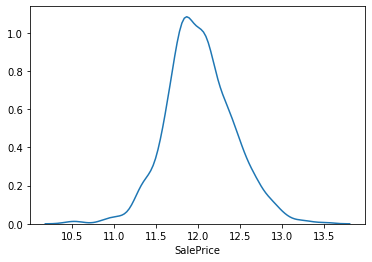

In [40]:
# Transforming target variable

house_df['SalePrice'] = house_df['SalePrice'].apply(lambda x : np.log(x))
print(house_df['SalePrice'].describe())
sns.distplot(house_df['SalePrice'], hist=False)

In [41]:
# Binning least significant levels into 'other' category

house_df['LotShape'] = house_df['LotShape'].apply(lambda x : 'other' if x in ['IR2', 'IR3'] else x)
house_df['LotConfig'] = house_df['LotConfig'].apply(lambda x : 'other' if x in ['FR2', 'FR3'] else x)
house_df['Neighborhood'] = house_df['Neighborhood'].apply(lambda x : 'other' if x in ['NPkVill', 'Blueste'] else x)
house_df['HouseStyle'] = house_df['HouseStyle'].apply(lambda x : 'other' if x not in ['1Story', '2Story', '1.5Fin'] else x)
house_df['OverallQual'] = house_df['OverallQual'].apply(lambda x : 'other' if x in [9, 3, 10, 2, 1] else x)
house_df['OverallCond'] = house_df['OverallCond'].apply(lambda x : 'other' if x not in [5, 6, 7] else x)
house_df['Exterior2nd'] = house_df['Exterior2nd'].apply(lambda x : 'other' if x in ['CBlock', 'Other'] else x)
house_df['MasVnrType'] = house_df['MasVnrType'].apply(lambda x : 'other' if x in ['Stone', 'BrkCmn'] else x)
house_df['ExterQual'] = house_df['ExterQual'].apply(lambda x : 'other' if x in ['Ex', 'Fa'] else x)
house_df['Foundation'] = house_df['Foundation'].apply(lambda x : 'other' if x in ['Slab', 'Stone', 'Wood'] else x)
house_df['BsmtQual'] = house_df['BsmtQual'].apply(lambda x : 'other' if x in ['Ex', 'No Basement', 'Fa'] else x)
house_df['BsmtFinType1'] = house_df['BsmtFinType1'].apply(lambda x : 'other' if x in ['LwQ', 'No Basement'] else x)
house_df['HeatingQC'] = house_df['HeatingQC'].apply(lambda x : 'other' if x in ['Fa', 'Po'] else x)
house_df['BsmtFullBath'] = house_df['BsmtFullBath'].apply(lambda x : 'other' if x in [2, 3] else x)
house_df['FullBath'] = house_df['FullBath'].apply(lambda x : 'other' if x in [3, 0] else x)
house_df['HalfBath'] = house_df['HalfBath'].apply(lambda x : 'other' if x in [2] else x)
house_df['BedroomAbvGr'] = house_df['BedroomAbvGr'].apply(lambda x : 'other' if x not in [3, 2, 4] else x)
house_df['KitchenQual'] = house_df['KitchenQual'].apply(lambda x : 'other' if x in ['Ex', 'Fa'] else x)
house_df['TotRmsAbvGrd'] = house_df['TotRmsAbvGrd'].apply(lambda x : 'other' if x in [14, 2] else x)
house_df['Fireplaces'] = house_df['Fireplaces'].apply(lambda x : 'other' if x in [2, 3] else x)
house_df['FireplaceQu'] = house_df['FireplaceQu'].apply(lambda x : 'other' if x in ['Fa', 'Ex', 'Po'] else x)
house_df['GarageType'] = house_df['GarageType'].apply(lambda x : 'other' if x not in ['Attchd', 'Detchd'] else x)
house_df['GarageCars'] = house_df['GarageCars'].apply(lambda x : 'other' if x in [0, 4] else x)

In [42]:
# Method to create dummies, concat them to original data frame and drop original column

def create_dummies(var1, var2):
    df = house_df
    dummies = pd.get_dummies(df[var1], prefix=var1)
    dummies.drop(columns=[var1+'_'+var2], inplace=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(columns=var1, inplace=True)
    return df

In [43]:
# Create dummies

house_df = create_dummies('LotShape', 'other')
house_df = create_dummies('LotConfig', 'other')
house_df = create_dummies('Neighborhood', 'other')
house_df = create_dummies('HouseStyle', 'other')
house_df = create_dummies('OverallQual', 'other')
house_df = create_dummies('OverallCond', 'other')
house_df = create_dummies('Exterior1st', 'CBlock')
house_df = create_dummies('Exterior2nd', 'other')
house_df = create_dummies('MasVnrType', 'other')
house_df = create_dummies('ExterQual', 'other')
house_df = create_dummies('Foundation', 'other')
house_df = create_dummies('BsmtQual', 'other')
house_df = create_dummies('BsmtExposure', 'No Basement')
house_df = create_dummies('BsmtFinType1', 'other')
house_df = create_dummies('HeatingQC', 'other')
house_df = create_dummies('BsmtFullBath', 'other')
house_df = create_dummies('FullBath', 'other')
house_df = create_dummies('HalfBath', 'other')
house_df = create_dummies('BedroomAbvGr', 'other')
house_df = create_dummies('KitchenQual', 'other')
house_df = create_dummies('TotRmsAbvGrd', 'other')
house_df = create_dummies('Fireplaces', 'other')
house_df = create_dummies('FireplaceQu', 'other')
house_df = create_dummies('GarageType', 'other')
house_df = create_dummies('GarageFinish', 'No Garage')
house_df = create_dummies('GarageCars', 'other')

In [44]:
# perform train test split

house_train, house_test = train_test_split(house_df, train_size = 0.7, random_state=100)

In [45]:
# Inspect train dataset

house_train

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3
318,60,90.0,9900,256.0,987,0,360,1347,1372,1274,...,0,1,1,0,0,1,0,0,0,1
239,50,52.0,8741,0.0,94,0,641,735,798,689,...,0,0,0,1,0,0,1,1,0,0
986,50,59.0,5310,0.0,0,0,485,485,1001,634,...,1,0,1,0,0,0,1,1,0,0
1416,190,60.0,11340,0.0,0,0,777,777,1246,1044,...,1,0,0,1,0,0,1,0,1,0
390,50,50.0,8405,0.0,241,391,229,861,961,406,...,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,60,63.0,8199,0.0,648,0,80,728,728,728,...,0,0,1,0,1,0,0,0,1,0
53,20,68.0,50271,0.0,1810,0,32,1842,1842,0,...,0,0,1,0,1,0,0,0,0,1
350,120,68.0,7820,362.0,0,0,1869,1869,1869,0,...,0,0,1,0,0,1,0,0,1,0
79,50,60.0,10440,0.0,0,0,440,440,682,548,...,1,0,0,1,0,0,1,0,1,0


In [46]:
# Inspect test dataset

house_test

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3
1436,20,60.0,9000,0.0,616,0,248,864,864,0,...,1,0,0,1,0,0,1,0,1,0
57,60,89.0,11645,0.0,0,0,860,860,860,860,...,1,0,1,0,0,1,0,0,1,0
780,20,63.0,7875,38.0,0,0,1237,1237,1253,0,...,0,1,1,0,1,0,0,0,1,0
382,60,79.0,9245,0.0,0,0,939,939,939,858,...,1,0,1,0,0,1,0,0,1,0
1170,80,76.0,9880,0.0,522,0,574,1096,1118,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,45,58.0,6380,0.0,0,0,993,993,1048,0,...,0,0,0,1,0,0,1,1,0,0
399,60,65.0,8125,100.0,812,0,280,1092,1112,438,...,1,0,1,0,1,0,0,0,1,0
545,50,69.0,13837,178.0,1002,202,0,1204,1377,806,...,1,0,1,0,0,0,1,0,0,1
266,60,70.0,11207,0.0,714,0,88,802,802,709,...,0,1,1,0,1,0,0,0,1,0


In [47]:
# Create X_train and y_train

y_train = house_train.pop('SalePrice')
X_train = house_train

In [48]:
# Scaling Continuous variables

cont_vars = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
 '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
 'PoolArea', 'MiscVal', 'property_age', 'garage_age', 'YearRemodAdd_age', 'YrSold_age']

scaler = StandardScaler()
X_train[cont_vars] = scaler.fit_transform(X_train[cont_vars])

In [49]:
# Create X_test and y_test

y_test = house_test.pop('SalePrice')
X_test = house_test
X_test[cont_vars] = scaler.transform(X_test[cont_vars])

## Step 5: Ridge Regression

In [50]:
# Feature selection using RFE

ridge = Ridge()
ridge.fit(X_train, y_train)

rfe = RFE(ridge, 50)
rfe = rfe.fit(X_train, y_train)

ridge_col = (X_train.columns[rfe.support_])
ridge_col

Index(['1stFlrSF', '2ndFlrSF', 'property_age', 'YearRemodAdd_age',
       'LotConfig_CulDSac', 'Neighborhood_Blmngtn', 'Neighborhood_BrDale',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'HouseStyle_2Story', 'OverallQual_8', 'OverallCond_6', 'OverallCond_7',
       'Exterior1st_AsbShng', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_Wd Shng', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_GLQ', 'FullBath_2',
       'KitchenQual_Gd', 'KitchenQual_TA', 'TotRmsAbvGrd_3', 'TotRmsAbvGrd_4',
       'TotRmsAbvGrd_11', 'TotRmsAbvGrd_12', 'FireplaceQu_No Fireplace',
       'GarageTyp

In [51]:
# Hyper parameter tuning

params = {
    'alpha' : [0.0001, 0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10, 15, 20, 25, 50]
}

ridge_model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       n_jobs = -1,
                       cv = 5,
                       verbose = 1,
                       return_train_score=True)
ridge_model_cv.fit(X_train[ridge_col], y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    5.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2,
                                   3, 4, 5, 10, 15, 20, 25, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [52]:
# Cross validation results

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023083,0.004913,0.002400,0.002945,0.0001,{'alpha': 0.0001},-0.098476,-0.103243,-0.108140,-0.106632,...,-0.103999,0.003331,12,-0.098812,-0.094067,-0.094148,-0.097422,-0.097931,-0.096476,0.001984
1,0.019578,0.014132,0.003832,0.003661,0.001,{'alpha': 0.001},-0.098473,-0.103242,-0.108139,-0.106630,...,-0.103997,0.003331,11,-0.098812,-0.094067,-0.094148,-0.097421,-0.097931,-0.096476,0.001984
2,0.009021,0.002210,0.003188,0.002672,0.1,{'alpha': 0.1},-0.098217,-0.103212,-0.108020,-0.106362,...,-0.103854,0.003349,10,-0.098796,-0.094076,-0.094087,-0.097357,-0.097904,-0.096444,0.001983
3,0.005218,0.003869,0.005018,0.003703,0.2,{'alpha': 0.2},-0.097986,-0.103233,-0.107914,-0.106101,...,-0.103731,0.003363,9,-0.098779,-0.094089,-0.094032,-0.097296,-0.097881,-0.096416,0.001980
4,0.008003,0.000366,0.001816,0.003157,0.3,{'alpha': 0.3},-0.097774,-0.103303,-0.107815,-0.105883,...,-0.103631,0.003381,8,-0.098764,-0.094101,-0.093997,-0.097239,-0.097864,-0.096393,0.001974
5,0.008098,0.001036,0.000399,0.000798,0.4,{'alpha': 0.4},-0.097572,-0.103362,-0.107729,-0.105683,...,-0.103539,0.003404,7,-0.098749,-0.094114,-0.093976,-0.097184,-0.097845,-0.096373,0.001966
6,0.007763,0.006109,0.002608,0.002822,0.5,{'alpha': 0.5},-0.097377,-0.103413,-0.107673,-0.105489,...,-0.103458,0.003435,5,-0.098740,-0.094128,-0.093959,-0.097136,-0.097841,-0.096361,0.001960
7,0.005353,0.005876,0.004950,0.003651,1,{'alpha': 1},-0.096531,-0.103589,-0.107448,-0.104686,...,-0.103114,0.003606,3,-0.098751,-0.094269,-0.093897,-0.097000,-0.097904,-0.096364,0.001947
8,0.010407,0.003298,0.002973,0.001258,2,{'alpha': 2},-0.095454,-0.104027,-0.107509,-0.103878,...,-0.102907,0.003994,1,-0.099010,-0.094535,-0.093973,-0.097005,-0.098115,-0.096528,0.001970
9,0.004790,0.002932,0.003385,0.003415,3,{'alpha': 3},-0.094782,-0.104515,-0.107914,-0.103582,...,-0.103042,0.004397,2,-0.099395,-0.094946,-0.094212,-0.097158,-0.098402,-0.096823,0.001978


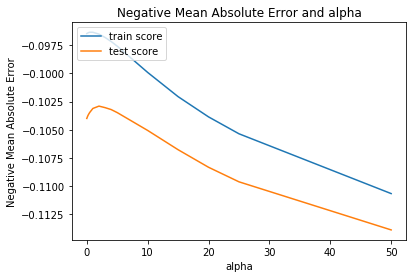

In [53]:
# Plotting Train and test errors

def plot_train_test_error(df):
    plt.plot(df['param_alpha'], df['mean_train_score'])
    plt.plot(df['param_alpha'], df['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('Negative Mean Absolute Error')
    plt.title("Negative Mean Absolute Error and alpha")
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.show()
plot_train_test_error(ridge_cv_results)

At Alpha=12, the difference between train and test error is minimum and from there on the difference is almost constant and the curves are almost parallel to each other.

In [54]:
# Final fit

ridge_alpha = 12

ridge = Ridge(ridge_alpha)
ridge.fit(X_train[ridge_col], y_train)
ridge.coef_

array([ 0.13017497,  0.13839102, -0.07357096, -0.05777564,  0.05594132,
       -0.05520291, -0.07886172,  0.06332202,  0.13156853, -0.10948962,
       -0.11734114, -0.12451416,  0.05281637,  0.13451606, -0.05455147,
       -0.05187121,  0.07577998,  0.06125345,  0.04496967, -0.03927289,
        0.06634275,  0.04750094,  0.06985571, -0.04558704, -0.04517155,
        0.0783056 , -0.0405595 , -0.02642201, -0.02993473, -0.03790742,
        0.06720763,  0.1348523 ,  0.05288299,  0.03993989,  0.06288732,
       -0.0182468 , -0.03471873, -0.06236861, -0.09214618, -0.07314516,
       -0.05817295, -0.08872754, -0.08255491,  0.09843463,  0.06886788,
        0.11972346,  0.09926714,  0.06412685, -0.08083121, -0.06222505])

In [55]:
# r2 score on train data

y_train_pred_ridge = ridge.predict(X_train[ridge_col])
r2_score(y_train, y_train_pred_ridge)

0.8669643588261816

In [56]:
# r2 score on test data

y_pred_final_ridge = ridge.predict(X_test[ridge_col])
r2_score(y_test, y_pred_final_ridge)

0.8129944574757306

In [57]:
# Top 5 features of Ridge
ridge_top_features = pd.DataFrame(columns=['Feature_Name', 'Ridge_Coef'])
ridge_top_features['Feature_Name'] = list(ridge_col)
ridge_top_features['Ridge_Coef'] = ridge.coef_
ridge_top_5 = ridge_top_features.sort_values('Ridge_Coef', ascending=False).head()
ridge_top_5

,Feature_Name,Ridge_Coef
1,2ndFlrSF,0.138391
31,BsmtExposure_Gd,0.134852
13,Neighborhood_NridgHt,0.134516
8,Neighborhood_Crawfor,0.131569
0,1stFlrSF,0.130175


### Subjective Question 1

In [58]:
# doubling alpha value

ridge_alpha = 24

ridge = Ridge(ridge_alpha)
ridge.fit(X_train[ridge_col], y_train)
ridge.coef_

array([ 0.13568036,  0.13192888, -0.0762621 , -0.0588862 ,  0.05087926,
       -0.0388439 , -0.05187254,  0.04529381,  0.10339069, -0.09780813,
       -0.08656021, -0.08211748,  0.04298116,  0.11227188, -0.0412621 ,
       -0.04312873,  0.06137421,  0.03869092,  0.03172246, -0.02427703,
        0.06873198,  0.04101604,  0.06297925, -0.03587303, -0.02709681,
        0.0574953 , -0.02681755, -0.01385036, -0.01977928, -0.02788025,
        0.03896301,  0.10236179,  0.03025277,  0.01474407,  0.06258512,
       -0.01517742, -0.02534873, -0.0572355 , -0.06659355, -0.05982568,
       -0.03381512, -0.05444833, -0.08832863,  0.09102781,  0.05751839,
        0.08992177,  0.06968774,  0.03665526, -0.0573378 , -0.04552228])

In [59]:
# r2 score on train data

y_train_pred_ridge = ridge.predict(X_train[ridge_col])
r2_score(y_train, y_train_pred_ridge)

0.8559660789477599

In [60]:
# r2 score on test data

y_pred_final_ridge = ridge.predict(X_test[ridge_col])
r2_score(y_test, y_pred_final_ridge)

0.8058871441559485

In [61]:
# Top 5 features of Ridge
ridge_top_features = pd.DataFrame(columns=['Feature_Name', 'Ridge_Coef'])
ridge_top_features['Feature_Name'] = list(ridge_col)
ridge_top_features['Ridge_Coef'] = ridge.coef_
ridge_top_5 = ridge_top_features.sort_values('Ridge_Coef', ascending=False).head()
ridge_top_5

,Feature_Name,Ridge_Coef
0,1stFlrSF,0.135680
1,2ndFlrSF,0.131929
13,Neighborhood_NridgHt,0.112272
8,Neighborhood_Crawfor,0.103391
31,BsmtExposure_Gd,0.102362


From Ridge regression we got the same set of predictor variables in both the cases.

``1stFlrSF`` and ``2ndFlrSF`` are quite intuitive. If the area(Sq.feet) is more then it leads to higher prixe tag.
``Neighborhood_NridgHt`` and ``Neighborhood_Crawfor`` tells us that the property is rich locality and with ``BsmtExposure_Gd`` i.e good Basement eposire then the price will shoot up automatically.

## Step 6: Lasso Regression

In [62]:
# Feature selection using RFE

lasso = Lasso()
lasso.fit(X_train, y_train)

rfe = RFE(lasso, 50)
rfe = rfe.fit(X_train, y_train)

lasso_col = X_train.columns[rfe.support_]
lasso_col

Index(['Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
       'BsmtExposure_No', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf',
       'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_TA', 'BsmtFullBath_0',
       'BsmtFullBath_1', 'FullBath_1', 'FullBath_2', 'HalfBath_0',
       'HalfBath_1', 'BedroomAbvGr_2', 'BedroomAbvGr_3', 'BedroomAbvGr_4',
       'KitchenQual_Gd', 'KitchenQual_TA', 'TotRmsAbvGrd_3', 'TotRmsAbvGrd_4',
       'TotRmsAbvGrd_5', 'TotRmsAbvGrd_6', 'TotRmsAbvGrd_7', 'TotRmsAbvGrd_8',
       'TotRmsAbvGrd_9', 'TotRmsAbvGrd_10', 'TotRmsAbvGrd_11',
       'TotRmsAbvGrd_12', 'Fireplaces_0', 'Fireplaces_1', 'FireplaceQu_Gd',
       'FireplaceQu_No Fireplace', 'FireplaceQu_TA', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'GarageCars_1', 'GarageCars_2', 'GarageCars_

In [63]:
# Hyper parameter tuning

params = {
    'alpha' : [0.000025, 0.00005, 0.00001, 0.0001, 0.0002, 0.0005, 0.001, 0.005, 0.01, 0.02]
}

lasso_model_cv = GridSearchCV(estimator=lasso,
                              param_grid=params,
                              scoring='neg_mean_absolute_error',
                              n_jobs=-1,
                              cv=5,
                              verbose=1,
                              return_train_score=True)
lasso_model_cv.fit(X_train[lasso_col], y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [2.5e-05, 5e-05, 1e-05, 0.0001, 0.0002,
                                   0.0005, 0.001, 0.005, 0.01, 0.02]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [64]:
# Cross validation results

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.138613,0.021913,0.003440,0.001625,2.5e-05,{'alpha': 2.5e-05},-0.132507,-0.141277,-0.143957,-0.135949,...,-0.139128,0.004246,2,-0.130304,-0.127895,-0.126537,-0.129131,-0.129218,-0.128617,0.001290
1,0.104004,0.015611,0.003892,0.003072,5e-05,{'alpha': 5e-05},-0.132412,-0.140920,-0.143991,-0.136007,...,-0.139076,0.004256,1,-0.130396,-0.128176,-0.126571,-0.129269,-0.129366,-0.128756,0.001299
2,0.097812,0.008240,0.004749,0.003922,1e-05,{'alpha': 1e-05},-0.132521,-0.141547,-0.143942,-0.135928,...,-0.139161,0.004260,4,-0.130232,-0.127744,-0.126530,-0.128991,-0.129075,-0.128514,0.001267
3,0.063798,0.016096,0.002000,0.003036,0.0001,{'alpha': 0.0001},-0.132411,-0.140456,-0.144104,-0.136102,...,-0.139147,0.004328,3,-0.130589,-0.128521,-0.126661,-0.129504,-0.129510,-0.128957,0.001321
4,0.047025,0.011389,0.001924,0.002954,0.0002,{'alpha': 0.0002},-0.132332,-0.139768,-0.144379,-0.136007,...,-0.139263,0.004613,5,-0.131102,-0.129009,-0.126873,-0.129763,-0.129809,-0.129311,0.001392
5,0.018107,0.005607,0.003253,0.003263,0.0005,{'alpha': 0.0005},-0.132631,-0.137849,-0.145592,-0.136143,...,-0.139768,0.005464,6,-0.132901,-0.130942,-0.128087,-0.130659,-0.130803,-0.130678,0.001532
6,0.009964,0.003365,0.004249,0.003508,0.001,{'alpha': 0.001},-0.134480,-0.138647,-0.146607,-0.137943,...,-0.141963,0.006466,7,-0.135903,-0.134195,-0.130773,-0.133460,-0.133899,-0.133646,0.001658
7,0.008201,0.004964,0.001740,0.003008,0.005,{'alpha': 0.005},-0.146448,-0.154510,-0.154351,-0.143137,...,-0.152784,0.007751,8,-0.149448,-0.148284,-0.148409,-0.149409,-0.145456,-0.148201,0.001456
8,0.009816,0.005803,0.000399,0.000798,0.01,{'alpha': 0.01},-0.152325,-0.165185,-0.159384,-0.147402,...,-0.159466,0.009101,9,-0.157232,-0.156012,-0.154759,-0.158339,-0.154089,-0.156086,0.001558
9,0.006973,0.003579,0.004719,0.003857,0.02,{'alpha': 0.02},-0.164582,-0.178705,-0.166287,-0.158459,...,-0.169718,0.008527,10,-0.167572,-0.167424,-0.167235,-0.168820,-0.164860,-0.167182,0.001288


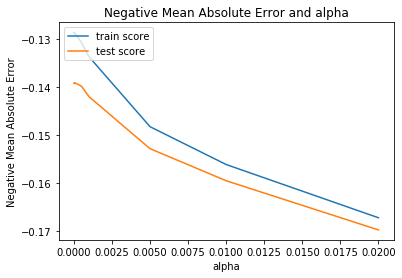

In [65]:
# Plotting Train and test error

plot_train_test_error(lasso_cv_results)

At Alpha=0.005, the difference between train and test error is minimum and from there on the difference is almost constant and the curves are almost parallel to each other.

In [66]:
# final fit

lasso_alpha = 0.005

lasso = Lasso(lasso_alpha)
lasso.fit(X_train[lasso_col], y_train)
lasso.coef_

array([ 0.        ,  0.03563531,  0.        , -0.        ,  0.        ,
        0.09413513,  0.        , -0.        ,  0.        ,  0.        ,
        0.07013236,  0.        , -0.00530005,  0.08432222,  0.        ,
       -0.        , -0.05513019,  0.        , -0.11778119,  0.        ,
       -0.03853743,  0.05267569, -0.0199969 ,  0.        ,  0.04537191,
       -0.        , -0.09355849, -0.        , -0.05852666, -0.00996771,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.05370612,
        0.        ,  0.        , -0.14123552, -0.        ,  0.02615055,
       -0.00423678, -0.        ,  0.09840128, -0.        ,  0.06821726,
        0.03704064, -0.        , -0.        ,  0.06089869,  0.27667177])

In [67]:
# r2 score on train data

y_train_pred_lasso = lasso.predict(X_train[lasso_col])
r2_score(y_train, y_train_pred_lasso)

0.7422218833126828

In [68]:
# r2 score on test data

y_pred_final_lasso = lasso.predict(X_test[lasso_col])
r2_score(y_test, y_pred_final_lasso)

0.7047565957232269

In [69]:
# Top 5 features of Lasso
lasso_top_features = pd.DataFrame(columns=['Feature_Name', 'Lasso_Coef'])
lasso_top_features['Feature_Name'] = list(lasso_col)
lasso_top_features['Lasso_Coef'] = lasso.coef_
lasso_top_5 = lasso_top_features.sort_values('Lasso_Coef', ascending=False).head()
lasso_top_5

,Feature_Name,Lasso_Coef
49,GarageCars_3,0.276672
42,GarageType_Attchd,0.098401
5,BsmtExposure_Gd,0.094135
13,HeatingQC_Ex,0.084322
10,BsmtFinType1_GLQ,0.070132


### Subjective Question 1

In [70]:
# doubling alpha

lasso_alpha = 0.01

lasso = Lasso(lasso_alpha)
lasso.fit(X_train[lasso_col], y_train)
lasso.coef_

array([ 0.        ,  0.04013477,  0.        , -0.00156478,  0.        ,
        0.04713286,  0.        , -0.        ,  0.        ,  0.        ,
        0.0709176 , -0.        , -0.        ,  0.08001194,  0.        ,
       -0.        , -0.04777237,  0.        , -0.13934995,  0.        ,
       -0.03316943,  0.05396493, -0.01218129,  0.        ,  0.01124205,
        0.        , -0.09513929, -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.16148688, -0.        ,  0.00763963,
       -0.00512938, -0.        ,  0.1048725 , -0.        ,  0.04317315,
        0.0040556 , -0.        , -0.02829629,  0.        ,  0.20610723])

In [71]:
# r2 score on train data

y_train_pred_lasso = lasso.predict(X_train[lasso_col])
r2_score(y_train, y_train_pred_lasso)

0.7096816727710815

In [72]:
# r2 score on test data

y_pred_final_lasso = lasso.predict(X_test[lasso_col])
r2_score(y_test, y_pred_final_lasso)

0.6708302665942475

In [73]:
# Top 5 features of Lasso
lasso_top_features = pd.DataFrame(columns=['Feature_Name', 'Lasso_Coef'])
lasso_top_features['Feature_Name'] = list(lasso_col)
lasso_top_features['Lasso_Coef'] = lasso.coef_
lasso_top_5 = lasso_top_features.sort_values('Lasso_Coef', ascending=False).head()
lasso_top_5

,Feature_Name,Lasso_Coef
49,GarageCars_3,0.206107
42,GarageType_Attchd,0.104872
13,HeatingQC_Ex,0.080012
10,BsmtFinType1_GLQ,0.070918
21,HalfBath_1,0.053965


From Lasso regression, we have almost similar predictor variables in top 5 except for ``BsmtExposure_Gd`` and ``HalfBath_1``.

``GarageCars_3, GarageType_Attchd, HeatingQC_Ex, BsmtExposure_Gd`` and ``HalfBath_1`` are the predictor variable given by Lasso and all of them are premium eminities which inturn leads to hefty price tags on the property.

### Subjective Question 3: Rebuilding the model after removing top 5 predictor variables

Our original top 5 predictor variables are ``GarageCars_3, GarageType_Attchd, BsmtExposure_Gd, HeatingQC_Ex`` and ``BsmtFinType1_GLQ``.

After removing them we will be left with below 45 variables

``['GarageFinish_Fin', 'GarageCars_2', 'TotRmsAbvGrd_10', 'HalfBath_1', 'BedroomAbvGr_4', 'GarageFinish_RFn',     'Foundation_PConc', 'FireplaceQu_Gd', 'GarageType_Detchd', 'FireplaceQu_TA', 'Fireplaces_1', 'TotRmsAbvGrd_12', 'TotRmsAbvGrd_11', 'GarageFinish_Unf', 'TotRmsAbvGrd_9', 'TotRmsAbvGrd_8', 'TotRmsAbvGrd_7', 'GarageCars_1', 'TotRmsAbvGrd_6', 'TotRmsAbvGrd_3', 'Foundation_CBlock', 'HeatingQC_Gd', 'BedroomAbvGr_3', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Av', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_Rec', 'KitchenQual_Gd', 'HeatingQC_TA', 'BsmtFullBath_1', 'FullBath_2', 'FireplaceQu_No Fireplace', 'BsmtFinType1_Unf', 'TotRmsAbvGrd_5', 'BedroomAbvGr_2', 'HalfBath_0', 'BsmtFullBath_0', 'TotRmsAbvGrd_4', 'KitchenQual_TA', 'FullBath_1', 'Fireplaces_0']``

In [74]:
# Delete top 5 predictor variables

remaining_vars = lasso_top_features.sort_values('Lasso_Coef', ascending=False)['Feature_Name'].values[5:]
remaining_vars

array(['BsmtExposure_Gd', 'GarageFinish_Fin', 'Foundation_PConc',
       'BedroomAbvGr_4', 'FireplaceQu_Gd', 'GarageFinish_RFn',
       'TotRmsAbvGrd_9', 'TotRmsAbvGrd_4', 'TotRmsAbvGrd_5',
       'TotRmsAbvGrd_6', 'TotRmsAbvGrd_7', 'TotRmsAbvGrd_8',
       'GarageFinish_Unf', 'TotRmsAbvGrd_10', 'TotRmsAbvGrd_11',
       'TotRmsAbvGrd_3', 'Fireplaces_1', 'FireplaceQu_TA', 'GarageCars_2',
       'GarageType_Detchd', 'TotRmsAbvGrd_12', 'Foundation_CBlock',
       'BsmtFinType1_Unf', 'BedroomAbvGr_3', 'BsmtQual_Gd',
       'BsmtExposure_Av', 'BsmtExposure_Mn', 'BsmtExposure_No',
       'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_Rec',
       'KitchenQual_Gd', 'HeatingQC_Gd', 'HeatingQC_TA', 'BsmtFullBath_1',
       'FullBath_2', 'BsmtQual_TA', 'FireplaceQu_No Fireplace',
       'BedroomAbvGr_2', 'GarageCars_1', 'HalfBath_0', 'BsmtFullBath_0',
       'KitchenQual_TA', 'FullBath_1', 'Fireplaces_0'], dtype=object)

In [75]:
# Hyper parameter tuning

lasso = Lasso()

params = {
    'alpha' : [0.000025, 0.00005, 0.00001, 0.0001, 0.0002, 0.0005, 0.001, 0.005, 0.01, 0.02]
}

lasso_model_cv = GridSearchCV(estimator=lasso,
                              param_grid=params,
                              scoring='neg_mean_absolute_error',
                              n_jobs=-1,
                              cv=5,
                              verbose=1,
                              return_train_score=True)
lasso_model_cv.fit(X_train[remaining_vars], y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [2.5e-05, 5e-05, 1e-05, 0.0001, 0.0002,
                                   0.0005, 0.001, 0.005, 0.01, 0.02]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [76]:
# Cross validation results

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.089711,0.024820,0.008983,0.009646,2.5e-05,{'alpha': 2.5e-05},-0.135142,-0.140730,-0.143480,-0.140358,...,-0.140781,0.003200,4,-0.132765,-0.131664,-0.129674,-0.131232,-0.132049,-0.131477,0.001033
1,0.059002,0.019673,0.003768,0.003455,5e-05,{'alpha': 5e-05},-0.135012,-0.140288,-0.143475,-0.140291,...,-0.140690,0.003295,3,-0.132887,-0.131818,-0.129719,-0.131387,-0.132210,-0.131604,0.001064
2,0.082218,0.006216,0.004708,0.003335,1e-05,{'alpha': 1e-05},-0.135203,-0.140885,-0.143499,-0.140436,...,-0.140811,0.003146,5,-0.132662,-0.131518,-0.129645,-0.131077,-0.131902,-0.131361,0.001004
3,0.031449,0.009844,0.002142,0.002132,0.0001,{'alpha': 0.0001},-0.134950,-0.139771,-0.143509,-0.140167,...,-0.140605,0.003400,2,-0.133050,-0.132059,-0.129816,-0.131606,-0.132360,-0.131778,0.001088
4,0.017049,0.002622,0.003704,0.003379,0.0002,{'alpha': 0.0002},-0.134944,-0.139164,-0.143533,-0.140042,...,-0.140564,0.003575,1,-0.133358,-0.132404,-0.130058,-0.131893,-0.132551,-0.132053,0.001103
5,0.011679,0.003120,0.001518,0.003037,0.0005,{'alpha': 0.0005},-0.135310,-0.138685,-0.144198,-0.140302,...,-0.141255,0.004349,6,-0.134361,-0.133757,-0.131078,-0.132780,-0.133644,-0.133124,0.001141
6,0.015046,0.003883,0.001917,0.003358,0.001,{'alpha': 0.001},-0.136932,-0.140704,-0.145998,-0.142198,...,-0.143786,0.005502,7,-0.137428,-0.136959,-0.133632,-0.135086,-0.136327,-0.135886,0.001374
7,0.008663,0.004864,0.004282,0.003238,0.005,{'alpha': 0.005},-0.159605,-0.171926,-0.166203,-0.156973,...,-0.168156,0.010379,8,-0.163782,-0.162803,-0.165794,-0.164186,-0.159333,-0.163179,0.002152
8,0.008062,0.003703,0.002400,0.002943,0.01,{'alpha': 0.01},-0.165270,-0.180261,-0.175136,-0.162584,...,-0.175336,0.011111,9,-0.174008,-0.171050,-0.172938,-0.172738,-0.168030,-0.171753,0.002089
9,0.007175,0.001253,0.001432,0.001790,0.02,{'alpha': 0.02},-0.180442,-0.194192,-0.182624,-0.173360,...,-0.185926,0.009369,10,-0.186586,-0.184123,-0.185093,-0.185974,-0.180399,-0.184435,0.002183


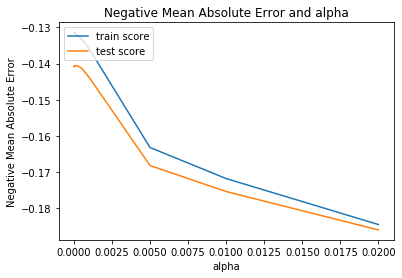

In [77]:
# Plotting Train and test error

plot_train_test_error(lasso_cv_results)

At Alpha=0.0125, the difference between train and test error is minimum and from there on the difference is constant and the curves are almost parallel to each other.

In [78]:
# Rebuild model

lasso_alpha = 0.005

lasso = Lasso(lasso_alpha)
lasso.fit(X_train[remaining_vars], y_train)
lasso.coef_

array([ 0.13422824,  0.12523894,  0.09781235,  0.0556317 ,  0.04032084,
        0.08921006,  0.        , -0.07069586, -0.02267643, -0.        ,
        0.        ,  0.        ,  0.        ,  0.09587723,  0.        ,
       -0.        , -0.        , -0.        , -0.00837739, -0.02218965,
        0.        ,  0.        , -0.0372846 ,  0.00608048, -0.        ,
        0.00832368,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.01426409, -0.04616909,  0.        ,
        0.        , -0.02421627, -0.16201061, -0.02836666, -0.03200144,
       -0.08240832, -0.08070574, -0.13005328, -0.12898611, -0.00450111])

In [79]:
# r2 score on train data

y_train_pred_lasso = lasso.predict(X_train[remaining_vars])
r2_score(y_train, y_train_pred_lasso)

0.6951775138746925

In [80]:
# r2 score on test data

y_pred_final_lasso = lasso.predict(X_test[remaining_vars])
r2_score(y_test, y_pred_final_lasso)

0.6389576025746604

In [81]:
# Top 5 features of Lasso after rebuilding

lasso_top_features = pd.DataFrame(columns=['Feature_Name', 'Lasso_Coef'])
lasso_top_features['Feature_Name'] = list(remaining_vars)
lasso_top_features['Lasso_Coef'] = lasso.coef_
lasso_top_5 = lasso_top_features.sort_values('Lasso_Coef', ascending=False).head()
lasso_top_5

,Feature_Name,Lasso_Coef
0,BsmtExposure_Gd,0.134228
1,GarageFinish_Fin,0.125239
2,Foundation_PConc,0.097812
13,TotRmsAbvGrd_10,0.095877
5,GarageFinish_RFn,0.089210
